In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import cv2
from scipy.spatial import cKDTree
from scipy.optimize import minimize
import PredictImage as prim
import os

In [2]:
cur_cam_index = 6
K = np.array([
    [3253.45225, -3.08866451, 4745.21992],
    [0.0, 3252.26117, 3142.22723],
    [0.0, 0.0, 1.0]
], dtype=np.float64)

#D = np.array([0.05003216, -0.04567757, 0.06960187, -0.03096402], dtype=np.float64)
D =np.array([  0.08330459003495257, 0.008459725805467274,  0.000681253494528032, 0.0001603712146519313])

image_filename_current = "C:\\Users\\ablai\\Documents\\photogrammetry\\led-runs-12may2025\\led-runs-12may2025\\c7_img20250512-12_06_55CEST.jpg"
overlay_filename_current = "C:\\Users\\ablai\\Documents\\photogrammetry\\led-runs-12may2025\\led-runs-12may2025\\c7_img20250512-11_57_42CEST.jpg"


delta_pitch_deg=5.0
delta_yaw_deg=0.0 
delta_roll_deg=0.0 
delta_r=0.000

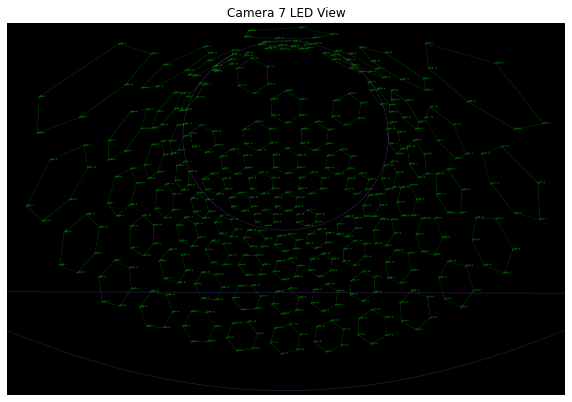

Saved image to camera7_f3253_p5_y0_r0_dr0.png


In [3]:
excluded_pmts = { 5, 9, 19, 15, 27, 29, 30, 31, 32, 35, 
    45, 46, 47, 48, 50, 51, 53, 57,
    61, 62, 63, 64, 65, 66, 74, 77, 79}

prim.simulate_fisheye_view("wcte_geometry_file.json", camera_index=cur_cam_index, K=K, D=D, delta_pitch_deg=delta_pitch_deg, delta_yaw_deg=delta_yaw_deg, delta_roll_deg=delta_roll_deg, delta_r=delta_r, excluded_pmts={})

In [4]:

blobs = prim.run_blob_detector( cur_cam_index, image_filename_current, minarea=20, maxarea=1000, minthres=20, maxthres=255 )
print('number of blobs before filter:',len(blobs))
blobs_filtered = prim.filter_blobs_by_distance(blobs, 50)
print('number of blobs:',len(blobs_filtered))

number of blobs before filter: 282
number of blobs: 274


In [5]:
prim.draw_image_with_blobs_save( cur_cam_index, image_filename_current, blobs_filtered, 'c'+str(cur_cam_index+1)+'_with_blob_annotation.jpg' )

Annotated image saved to: c7_with_blob_annotation.jpg


In [6]:
delta_pitch_deg=2.0
delta_yaw_deg=0.0 
delta_roll_deg=0.0 
delta_r=0.000
# Initial guess: [pitch, yaw, roll, r, k1, k2, k3, k4]
initial_guess = [delta_pitch_deg, delta_yaw_deg, delta_roll_deg, delta_r, 
                 D[0], D[1], D[2], D[3] ]

control_points = { 
    '082-6': (1247, 3862),
    '058-8': (6929, 4279),
    '006-8': (4667, 1421)
}

# non-fit bounts
dev_allowed = 15.0
bounds = [ (delta_pitch_deg-dev_allowed, delta_pitch_deg+dev_allowed),   # delta_pitch_deg
           (delta_yaw_deg-dev_allowed, delta_yaw_deg+dev_allowed),   # delta_yaw_deg
           (delta_roll_deg-dev_allowed, delta_roll_deg+dev_allowed),   # delta_roll_deg
           (-0.02, 0.02), # delta_r in meters
           (-0.1, 0.1), # k1 [ 0.05003216 -0.04567757  0.06960187 -0.03096402]
           (-0.009, 0.009), # k2
           (-0.0008, 0.0008), # k3
           (-0.0002, 0.0002)   ]

matches, fitpars = prim.match_blobs( blobs_filtered, "wcte_geometry_file.json", 
                            cur_cam_index, K, D, initial_guess=initial_guess, excluded_pmts=excluded_pmts,
                            bounds = bounds, control_points=control_points,  use_lm=True)

In [7]:
fitpars

{'delta_pitch_deg': 1.2769860442497525,
 'delta_yaw_deg': 0.4275128579132569,
 'delta_roll_deg': 2.980463238997582,
 'delta_r': -0.05586324828582002,
 'D_fit': array([ 0.1383324 , -0.24075809,  0.25506169, -0.08888099]),
 'chi2': 7360667.828952989,
 'success': True}

In [8]:
len(matches)

244

In [9]:
matches

[('000-6', 4532.248, 2472.316),
 ('000-7', 4521.6787, 2667.7913),
 ('000-8', 4752.171, 2775.3281),
 ('000-10', 4929.489, 2448.7034),
 ('000-11', 4725.7153, 2358.9895),
 ('001-6', 4144.1626, 2880.0142),
 ('001-7', 4176.2217, 3059.696),
 ('001-10', 4522.4546, 2852.9434),
 ('001-11', 4317.3667, 2771.9202),
 ('002-6', 4601.852, 3178.732),
 ('002-7', 4613.5527, 3338.141),
 ('002-9', 4951.768, 3320.7532),
 ('002-10', 4944.7725, 3161.2493),
 ('002-11', 4768.17, 3090.8782),
 ('003-7', 5364.175, 2811.0674),
 ('003-8', 5177.591, 2723.1108),
 ('003-9', 4983.314, 2827.3672),
 ('003-10', 4984.184, 3009.922),
 ('004-6', 5791.3027, 2628.6594),
 ('004-7', 5815.591, 2423.361),
 ('004-9', 5421.872, 2430.626),
 ('004-10', 5408.905, 2637.2825),
 ('004-11', 5591.9966, 2731.7822),
 ('006-6', 4923.944, 1798.0089),
 ('006-7', 4913.335, 1539.868),
 ('006-8', 4666.659, 1419.9628),
 ('006-9', 4439.631, 1571.8745),
 ('006-10', 4464.2373, 1829.4457),
 ('006-11', 4702.5693, 1937.1897),
 ('007-7', 4440.1997, 2047.34

In [10]:
img = prim.visualize_all_leds_and_matches( 
    image_filename_current,
    blobs,
    matches,
    fitpars,
    "wcte_geometry_file.json",
    cur_cam_index,
    K,
    fitpars['D_fit'],
    output_filename='c'+str(cur_cam_index+1)+"_blob_match_overlay.png",
    excluded_pmts=excluded_pmts,
    control_points=control_points,
    overlay_image_name=overlay_filename_current,
    alpha=0.2
)


{'delta_pitch_deg': 1.2769860442497525, 'delta_yaw_deg': 0.4275128579132569, 'delta_roll_deg': 2.980463238997582, 'delta_r': -0.05586324828582002, 'D_fit': array([ 0.1383324 , -0.24075809,  0.25506169, -0.08888099]), 'chi2': 7360667.828952989, 'success': True}
Overlay image saved to: c7_blob_match_overlay.png


In [11]:
output_filename = os.path.splitext( os.path.basename(image_filename_current) )[0] + ".json"

prim.save_matching_results_to_json(
    output_filename=output_filename,
    image_filename=image_filename_current,
    fitpars=fitpars, 
    matches=matches, 
    blobs=blobs, 
    geo_file="wcte_geometry_file.json", 
    camera_index=cur_cam_index, 
    K=K, 
    D=fitpars['D_fit'], 
    excluded_pmts=excluded_pmts)

excluded_pmts= {64, 65, 66, 5, 9, 74, 77, 15, 79, 19, 27, 29, 30, 31, 32, 35, 45, 46, 47, 48, 50, 51, 53, 57, 61, 62, 63}
geo_file= wcte_geometry_file.json
Sample matches labels: [('000-6', 4532.248, 2472.316), ('000-7', 4521.6787, 2667.7913), ('000-8', 4752.171, 2775.3281), ('000-10', 4929.489, 2448.7034), ('000-11', 4725.7153, 2358.9895), ('001-6', 4144.1626, 2880.0142), ('001-7', 4176.2217, 3059.696), ('001-10', 4522.4546, 2852.9434), ('001-11', 4317.3667, 2771.9202), ('002-6', 4601.852, 3178.732)]
Sample label_to_sim keys: ['000-6', '000-7', '000-8', '000-9', '000-10', '000-11', '001-6', '001-7', '001-8', '001-9']
Saved results to c7_img20250512-12_06_55CEST.json
